In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, preprocessing

In [2]:
data = pd.read_csv("data/mall.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: ylabel='Annual Income (k$)'>

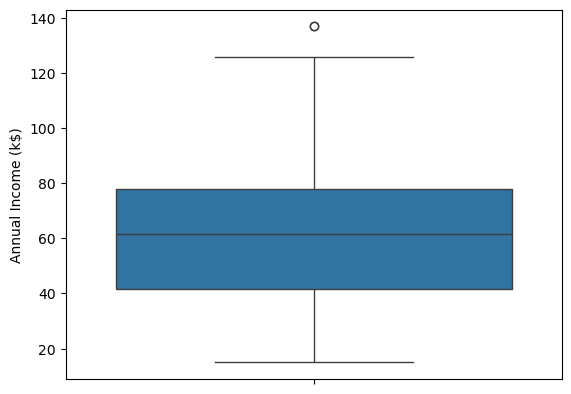

In [4]:
sns.boxplot(data["Annual Income (k$)"])

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

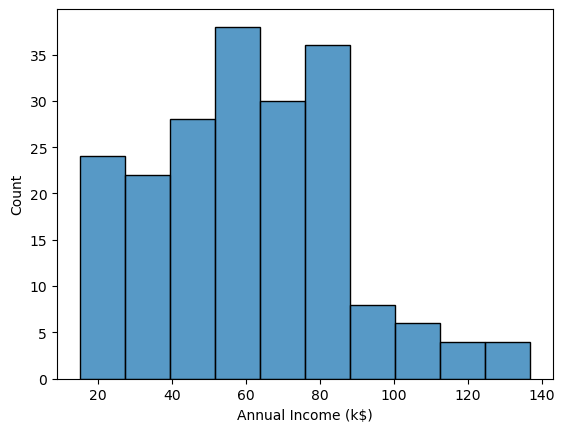

In [5]:
sns.histplot(data["Annual Income (k$)"])

<Axes: ylabel='Spending Score (1-100)'>

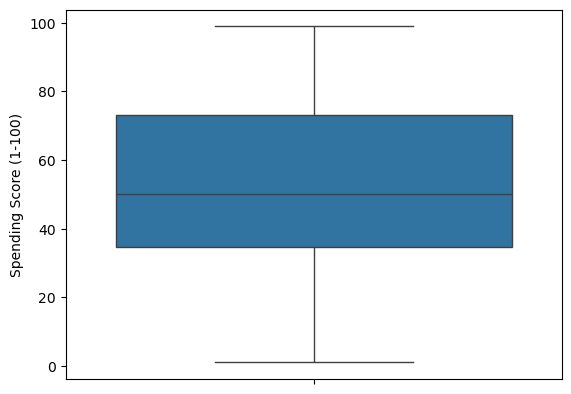

In [6]:
sns.boxplot(data["Spending Score (1-100)"])

In [7]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

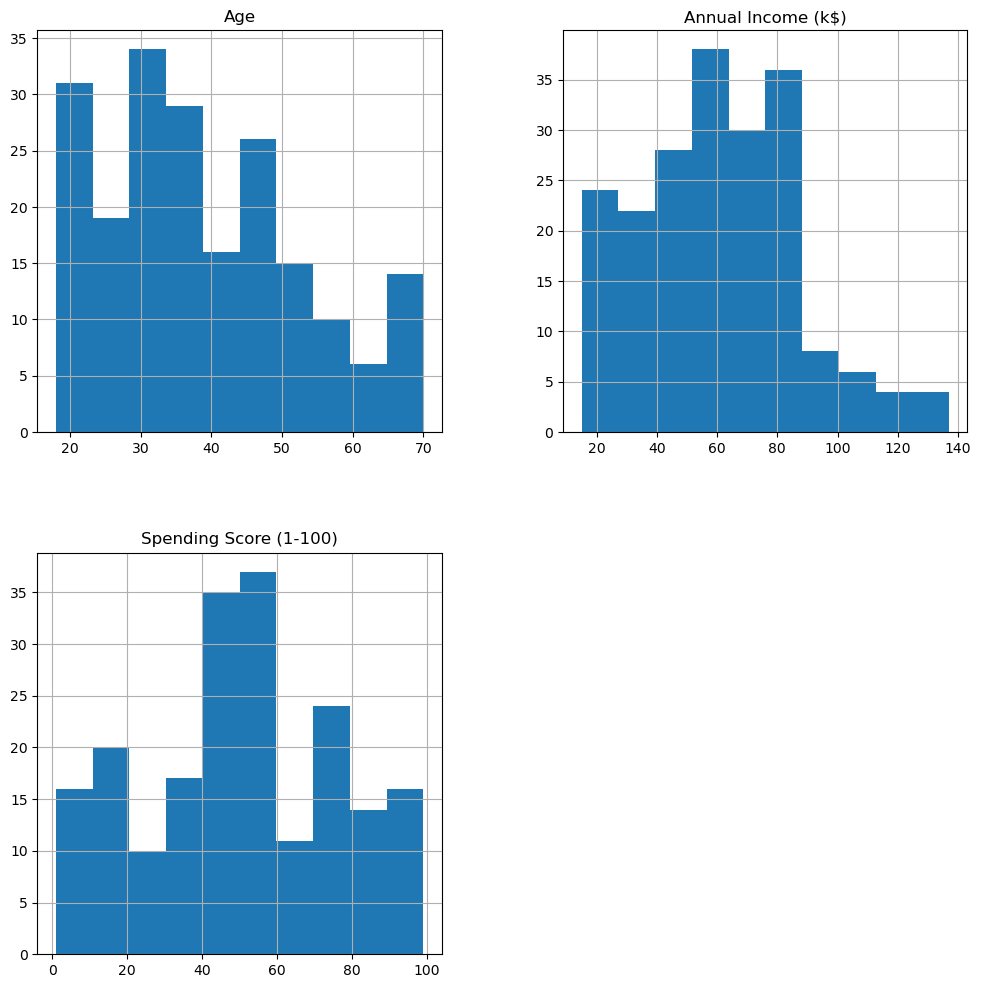

In [8]:
data[features].hist(figsize=(12, 12))

<Axes: >

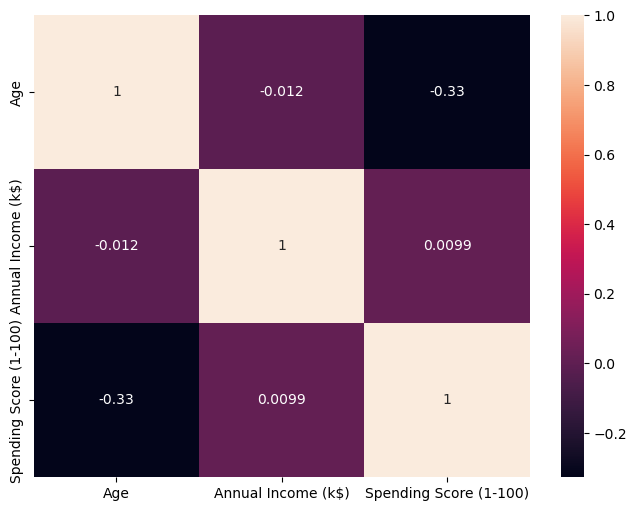

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[features].corr(method="pearson"), annot=True)

In [10]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

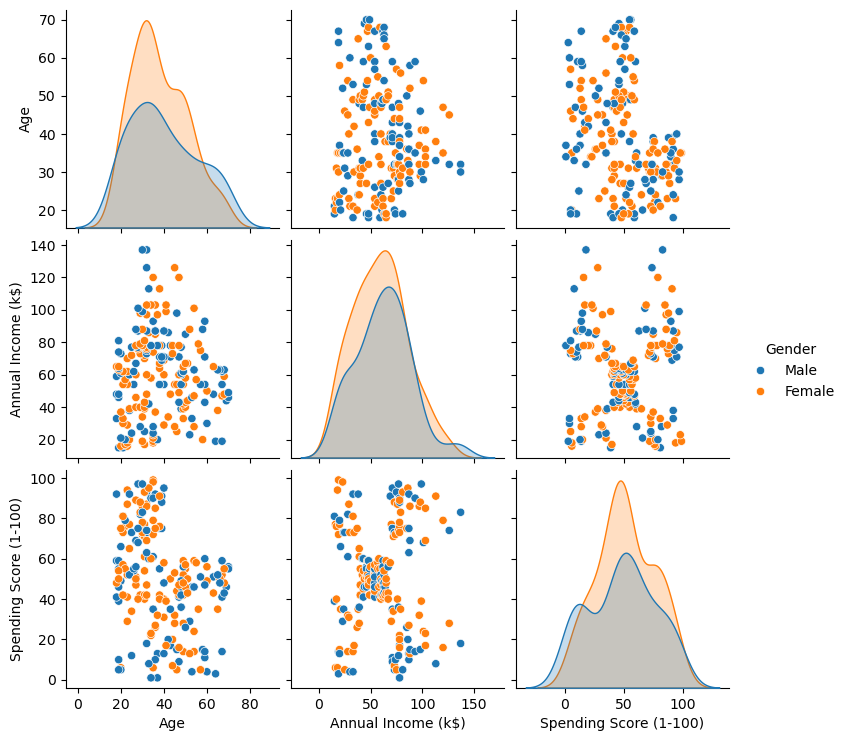

In [11]:
sns.pairplot(data[features + ["Gender"]], hue="Gender")
plt.show()

In [12]:
encoder = preprocessing.LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])
data.drop("CustomerID", axis=1, inplace=True)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]
model = cluster.KMeans(n_clusters=6, random_state=0)
model.fit(data[features])

centroids = model.cluster_centers_

labels = model.predict(data[features])
data["Cluster"] = labels
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,5
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,3


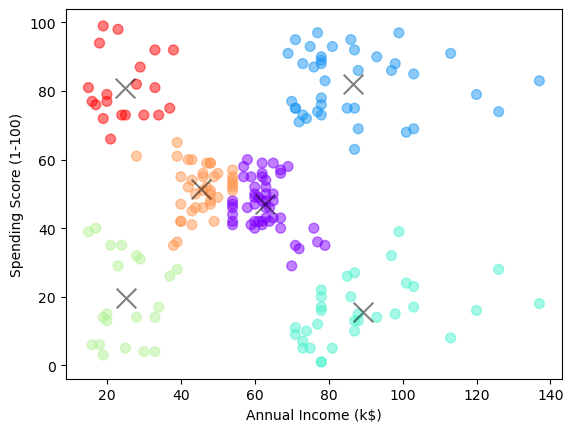

In [14]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Cluster"], s=50, alpha=0.5, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=200, alpha=0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [15]:
# With feature scaling
features = ["Annual Income (k$)", "Spending Score (1-100)"]
scaler = preprocessing.StandardScaler()
scaled_data = data.copy()
scaled_data[features] = scaler.fit_transform(scaled_data[features])
scaled_data.head()

model = cluster.KMeans(n_clusters=6, random_state=0)
model.fit(scaled_data[features])

scaled_centroids = model.cluster_centers_

labels = model.predict(scaled_data[features])
scaled_data["Cluster"] = labels
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,-1.738999,-0.434801,3
1,1,21,-1.738999,1.195704,5
2,0,20,-1.700830,-1.715913,3
3,0,23,-1.700830,1.040418,5
4,0,31,-1.662660,-0.395980,3


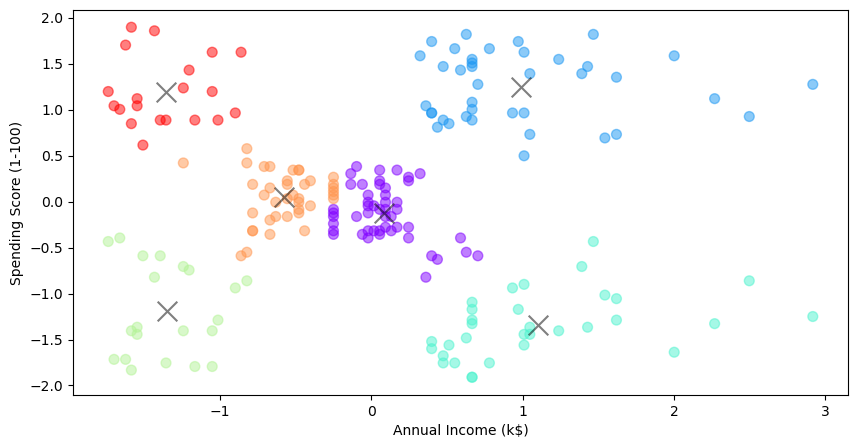

In [16]:
plt.scatter(scaled_data["Annual Income (k$)"], scaled_data["Spending Score (1-100)"], c=scaled_data["Cluster"], s=50, alpha=0.5, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.scatter(scaled_centroids[:, 0], scaled_centroids[:, 1], c="black", marker="x", s=200, alpha=0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

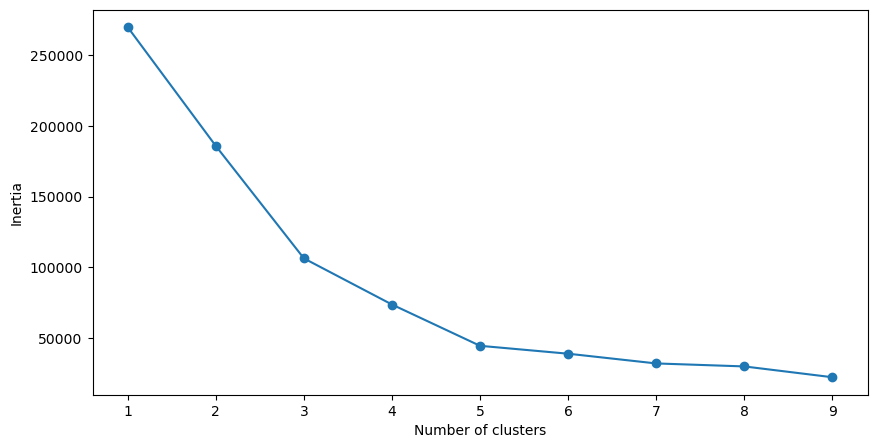

In [17]:
sse = []
n_clusters = list(range(1, 10))
for k in n_clusters:
    model = cluster.KMeans(n_clusters=k, random_state=0)
    model.fit(data[features])
    sse.append(model.inertia_)

plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(n_clusters, sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
data.groupby("Cluster")["Age"].mean()

Cluster
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [19]:
data.groupby("Cluster")["Annual Income (k$)"].mean()

Cluster
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64